
Plot randomly generated nonlinear regression datasets

Plot several randomly generated 1D regression datasets.
This example illustrates the :func:`datasets.make_log_regression`,
:func:`datasets.make_sin_regression`, :func:`datasets.make_square_regression`,
:func:`datasets.make_multiplicative_noise`, and
:func:`datasets.make_independent_noise` functions.

For each, :math:`n = 100` points are sampled with noise to show the actual
sample data used for one-dimensional relationships (red dots).

For comparison purposes, :math:`n = 1000` points are sampled without noise to
highlight each underlying dependency (black dots). Note that only black points
are plotted for the :func:`datasets.make_multiplicative_noise`, and
:func:`datasets.make_independent_noise` functions, as they do not have a noise
parameter.



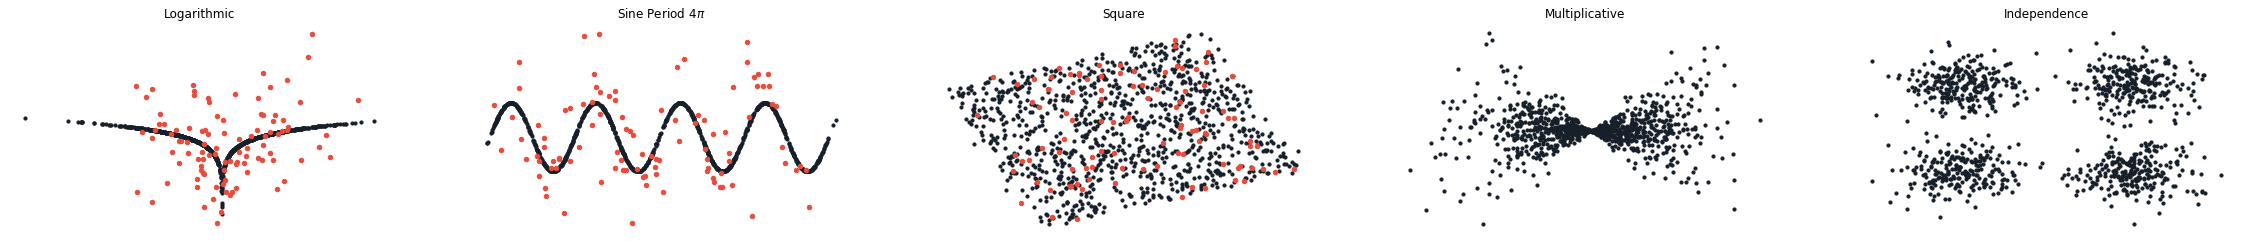

In [1]:
"""
=====================================================
Plot randomly generated nonlinear regression datasets
=====================================================

Plot several randomly generated 1D regression datasets.
This example illustrates the :func:`datasets.make_log_regression`,
:func:`datasets.make_sin_regression`, :func:`datasets.make_square_regression`,
:func:`datasets.make_multiplicative_noise`, and
:func:`datasets.make_independent_noise` functions.

For each, :math:`n = 100` points are sampled with noise to show the actual
sample data used for one-dimensional relationships (red dots).

For comparison purposes, :math:`n = 1000` points are sampled without noise to
highlight each underlying dependency (black dots). Note that only black points
are plotted for the :func:`datasets.make_multiplicative_noise`, and
:func:`datasets.make_independent_noise` functions, as they do not have a noise
parameter.
"""

# Author: Vivek Gopalakrishnan <vgopala4@jhu.edu>
# License: BSD 3 clause

import matplotlib.pyplot as plt

from sklearn.datasets import (make_independent_noise, make_log_regression,
                              make_multiplicative_noise, make_sin_regression,
                              make_square_regression)

print(__doc__)


def plot_simulation(simulation_name, ax):

    # Get simulation function
    sim, noise = simulations[simulation_name]

    # Sample noiseless and noisy versions of the data
    if noise is not None:
        X_pure, y_pure = sim(n_samples=1000, n_dimensions=1, noise=0)
        X_noise, y_noise = sim(n_samples=100, n_dimensions=1, noise=noise)
    else:
        X_pure, y_pure = sim(n_samples=1000, n_dimensions=1)

    # Plot the noiseless and noisy data sets
    ax.scatter(X_pure, y_pure, s=10, c="#17202A")
    if noise is not None:
        ax.scatter(X_noise, y_noise, s=20, c="#E74C3C")

    # Format axis
    ax.set_title(simulation_name)
    ax.axis("off")


simulations = {
    "Logarithmic": (make_log_regression, 3.0),
    r"Sine Period $4\pi$": (make_sin_regression, 1.0),
    "Square": (make_square_regression, 1.0),
    "Multiplicative": (make_multiplicative_noise, None),
    "Independence": (make_independent_noise, None),
}

_, axs = plt.subplots(1, 5, figsize=(40, 4))
plt.subplots_adjust(bottom=.15)

for simulation_name, ax in zip(simulations.keys(), axs):
    plot_simulation(simulation_name, ax)

plt.show()
